In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("hello world!")

hello world!


In [2]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 일단 데이터 어떤식인지 확인하기

In [3]:
train_data =  pd.read_csv('../data/train.csv')

train_data.head()

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
0,TRAIN_00000,2023-12-31 오후 12:44,정규작업 -,맑음,1℃,30%,건축 / 건축물 / 근린생활시설,"4,892.77㎡","지상 14층, 지하 3층",떨어짐(5미터 이상 ~ 10미터 미만),없음,건축 > 철근콘크리트공사,건설자재 > 철근,설치작업,근린생활시설 / 내부,철근 / 고소,"고소작업 중 추락 위험이 있음에도 불구하고, 안전난간대, 안전고리 착용 등 안전장치...",고소작업 시 추락 위험이 있는 부위에 안전장비 설치.
1,TRAIN_00001,2023-12-30 오후 03:35,정규작업 -,맑음,10℃,90%,토목 / 터널 / 철도터널,-,-,끼임,없음,토목 > 터널공사,건설자재 > 볼트,운반작업,철도터널 / 내부,볼트 / 바닥,부주의,재발 방지 대책 마련과 안전교육 실시.
2,TRAIN_00002,2023-12-30 오후 02:30,정규작업 -,맑음,14℃,70%,건축 / 건축물 / 업무시설,"1,994.62㎡","지상 5층, 지하 0층",넘어짐(미끄러짐),없음,건축 > 철근콘크리트공사,기타 > 기타,형틀 및 목공,업무시설 / 내부,기타 / 바닥,3층 슬라브 작업시 이동중 미끄러짐,현장자재 정리와 안전관리 철저를 통한 재발 방지 대책 및 공문 발송을 통한 향후 조...
3,TRAIN_00003,2023-12-30 오후 12:00,휴일근무 -,흐림,12℃,55%,토목 / 하천 / 기타,-,-,기타,전도,토목 > 하천공사,부재 > 교각 기초,조립작업,기타 / 동산교 신축구간,교각 기초 / 바닥,"교각 기초철근 조립 중 강한 바람에 의해 기둥측 주철근이 균형을 잃고 전도되어, 하...","위험성 평가 및 교육을 통해 작업장 내 위험요인과 안전수칙을 근로자에게 전파하고, ..."
4,TRAIN_00004,2023-12-30 오전 10:00,정규작업 -,맑음,0℃,10%,건축 / 건축물 / 공동주택,"59,388.93㎡","지상 27층, 지하 3층",넘어짐(미끄러짐),없음,건축 > 해체 및 철거공사,기타 > 건설폐기물,해체작업,공동주택 / 내부,건설폐기물 / 바닥,근로자의 부주의,자재 정리 작업 시 세부 작업 방법에 대한 교육 실시와 작업 구간 이동 경로 점검 ...


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23422 entries, 0 to 23421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               23422 non-null  object
 1   발생일시             23422 non-null  object
 2   사고인지 시간          23422 non-null  object
 3   날씨               23422 non-null  object
 4   기온               23422 non-null  object
 5   습도               23422 non-null  object
 6   공사종류             23422 non-null  object
 7   연면적              23422 non-null  object
 8   층 정보             23422 non-null  object
 9   인적사고             23390 non-null  object
 10  물적사고             21932 non-null  object
 11  공종               23411 non-null  object
 12  사고객체             22735 non-null  object
 13  작업프로세스           23359 non-null  object
 14  장소               23422 non-null  object
 15  부위               23422 non-null  object
 16  사고원인             23359 non-null  object
 17  재발방지대책 및 향후조치계획  23422 non-null

In [5]:
import numpy as np
train_data.replace( '-', np.nan, inplace=True)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23422 entries, 0 to 23421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               23422 non-null  object
 1   발생일시             23422 non-null  object
 2   사고인지 시간          20296 non-null  object
 3   날씨               23422 non-null  object
 4   기온               23422 non-null  object
 5   습도               23422 non-null  object
 6   공사종류             23422 non-null  object
 7   연면적              15334 non-null  object
 8   층 정보             15222 non-null  object
 9   인적사고             23390 non-null  object
 10  물적사고             21932 non-null  object
 11  공종               23411 non-null  object
 12  사고객체             22735 non-null  object
 13  작업프로세스           23359 non-null  object
 14  장소               23422 non-null  object
 15  부위               23422 non-null  object
 16  사고원인             23355 non-null  object
 17  재발방지대책 및 향후조치계획  23422 non-null

### train data구경 & 전처리

In [7]:
serieses = []

#### ID(조정의미없음)

In [8]:
print(train_data.iloc[:,0]) # ID는 꽤 의미없는 칼럼
serieses.append(train_data.iloc[:,0])

0        TRAIN_00000
1        TRAIN_00001
2        TRAIN_00002
3        TRAIN_00003
4        TRAIN_00004
            ...     
23417    TRAIN_23417
23418    TRAIN_23418
23419    TRAIN_23419
23420    TRAIN_23420
23421    TRAIN_23421
Name: ID, Length: 23422, dtype: object


#### 발생시간

In [9]:
train_data.iloc[:,1] # 이건 조정필요


0        2023-12-31 오후 12:44
1        2023-12-30 오후 03:35
2        2023-12-30 오후 02:30
3        2023-12-30 오후 12:00
4        2023-12-30 오전 10:00
                ...         
23417    2019-07-03 오후 03:10
23418    2019-07-03 오후 03:00
23419    2019-07-03 오후 03:00
23420    2019-07-03 오후 02:30
23421    2019-07-03 오후 02:30
Name: 발생일시, Length: 23422, dtype: object

In [10]:
def timeparser(time_str:str):
    tmep_str = time_str.replace('오전', 'AM').replace('오후', 'PM') # 오전오후 AMPM으로 변환
    tmep_str =  tmep_str if tmep_str[-5:-3] != '00' else tmep_str[:-5] + '12' + tmep_str[-3:] ## 00시를 12시로 바꾸기
    result =  pd.to_datetime(tmep_str, format="%Y-%m-%d %p %I:%M") ## 타입변환
    return result

event_time =  train_data.iloc[:,1]
event_time =  event_time.map(timeparser)
serieses.append(event_time)
event_time

0       2023-12-31 12:44:00
1       2023-12-30 15:35:00
2       2023-12-30 14:30:00
3       2023-12-30 12:00:00
4       2023-12-30 10:00:00
                ...        
23417   2019-07-03 15:10:00
23418   2019-07-03 15:00:00
23419   2019-07-03 15:00:00
23420   2019-07-03 14:30:00
23421   2019-07-03 14:30:00
Name: 발생일시, Length: 23422, dtype: datetime64[ns]

#### 사고인지시간

In [11]:
recog_time = train_data.iloc[:,2]
recog_time.unique()
## 세상에나..
recog_time_kind =  recog_time.map( lambda x: x.split(' -')[0].strip(), na_action='ignore')
recog_time_time = recog_time.map( lambda x: x.split(' - ')[1].strip() if len(x.split(' - ')) > 1 else np.nan , na_action='ignore')

In [12]:
recog_time_time.info()
serieses.append(recog_time_kind)

<class 'pandas.core.series.Series'>
RangeIndex: 23422 entries, 0 to 23421
Series name: 사고인지 시간
Non-Null Count  Dtype 
--------------  ----- 
334 non-null    object
dtypes: object(1)
memory usage: 183.1+ KB


#### 날씨(변경사항없음)

In [13]:
weather =  train_data.iloc[:,3]
serieses.append(weather)
weather

0        맑음
1        맑음
2        맑음
3        흐림
4        맑음
         ..
23417    맑음
23418    맑음
23419    맑음
23420    흐림
23421    강우
Name: 날씨, Length: 23422, dtype: object

#### 기온 (추후변경예정..)

In [14]:
temperture = train_data.iloc[:, 4]
temperture.unique()
# print(temperture.map(lambda x: x if x.endswith('℃') else np.nan).isna().sum())
temp_temperture =  temperture.map(lambda x : x.split('℃')[0]).replace('', np.nan)
serieses.append(temp_temperture)
temp_temperture

0         1
1        10
2        14
3        12
4         0
         ..
23417    28
23418    28
23419    24
23420    30
23421    24
Name: 기온, Length: 23422, dtype: object

In [15]:
temp_temp_dropna =temp_temperture.dropna()
## 우와...

temp_temp_dropna.map(lambda x: ('.' in x) ).sum()
### 생각보다 .들어간게 적어서 그냥 float로 바꿀게요

temp_temp_dropna = temp_temp_dropna.astype(float)
wrong =  temp_temp_dropna[(temp_temp_dropna > 35) | (temp_temp_dropna < -15)]


In [16]:
train_data.loc[wrong.index]

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인,재발방지대책 및 향후조치계획
81,TRAIN_00081,2023-12-26 오후 02:00,정규작업 -,맑음,91℃,50%,건축 / 건축물 / 업무시설,"1,292.59㎡","지상 1층, 지하 4층",끼임,없음,건축 > 철근콘크리트공사,건설자재 > 철근,타설작업,업무시설 / 외부,철근 / 옆,작업자 부주의,작업전 사전 안전교육 실시와 작업자의 부주의한 행동 항시 모니터링 감시.
110,TRAIN_00110,2023-12-25 오전 08:00,정규작업 -,흐림,-26℃,98%,토목 / 도로 / 도로,NaN,NaN,물체에 맞음,없음,토목 > 철근콘크리트공사,건설자재 > 자재,운반작업,도로 / 외부,자재 / 바닥,거푸집 설치를 위해 유로폼 운반 중 거푸집 낙하로 손가락 협착,인력운반 시 작업방법 및 작업순서 교육 실시와 현장 관리 강화를 통한 동일 사고 발...
120,TRAIN_00120,2023-12-23 오후 02:20,정규작업 -,흐림,-64℃,80%,건축 / 건축물 / 공동주택,"65,472㎡","지상 28층, 지하 5층","절단, 베임",없음,건축 > 철근콘크리트공사,가시설 > 비계,정리작업,공동주택 / 내부,비계 / 지하,비계에서 띠장 보걸이 해체 보조작업 후 비계 수직 승강용 사다리를 통해 해치발판을 ...,"해치발판 사용 시 덮개 완전 개방, 관리감독 철저, 안전교육 실시 및 안전관리 철저..."
183,TRAIN_00183,2023-12-20 오전 10:30,정규작업 -,맑음,-64℃,65%,건축 / 건축물 / 공동주택,"142,815.91㎡","지상 20층, 지하 2층",찔림,없음,토목 > 토공사,건설공구 > 공구류,청소작업,공동주택 / 내부,공구류 / 쪽가위,덤프트럭 적재함 후면 토사(흙) 청소 근로자가 부러진 빗자루를 임의로 수리하던 중 ...,자재와 공구에 대한 미숙련 근로자의 임의수리 금지와 해당 공종 전체 근로자 및 관리...
226,TRAIN_00226,2023-12-18 오전 10:30,정규작업 -,흐림,-54℃,98%,토목 / 도로 / 도로,NaN,NaN,물체에 맞음,없음,토목 > 해체 및 철거공사,가시설 > 거푸집,해체작업,도로 / 외부,거푸집 / 상부(위),횡배수관 도수로 거푸집 해체 작업 중재해자 쏨욧이 횡배수관 도수로 덮개의 거푸집 해...,유사사고 방지를 위한 실질적인 재발 방지 대책으로 거푸집 해체 작업 시 작업 방법 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22975,TRAIN_22975,2019-08-05 오후 02:40,NaN,흐림,36℃,80%,토목 / 도로 / 기타,NaN,NaN,물체에 맞음,없음,토목 > 관공사,토사 및 암반 > 경사면,매설작업,기타 /,경사면 /,하천인근 우수관로(흄관) 공사작업을 위한 관로 터파기 토사유출로 발생된 사고임,"터파기 구배 준수 및 필요시 작업자 안전시설 추가설치, 특별안전교육 실시 및 안전점..."
22976,TRAIN_22976,2019-08-05 오후 02:32,NaN,맑음,36℃,65%,건축 / 건축물 / 공장,NaN,NaN,기타,없음,건축 > 철근콘크리트공사,가시설 > 거푸집,운반작업,공장 /,거푸집 /,1.용접작업장 하부 근로자통제 미흡2.재해자의 자재운반 동선 불량,"위험작업구간 관리책임자 배치 강화, 하부 근로자 통제 강화, 불티비산 방지시설 설치..."
23064,TRAIN_23064,2019-07-29 오후 05:20,정규작업 -,맑음,294℃,70%,건축 / 건축물 / 공장,"1,101,562㎡",NaN,끼임,없음,건축 > 철골공사,부재 > 철골부재,설치작업,공장 / 외부,철골부재 / 고소,고소작업대 탑승과정중 사고발생,안전사고 재발 방지를 위한 감리자 및 현장관리자의 철저한 현장관리 지시.
23223,TRAIN_23223,2019-07-17 오전 11:40,정규작업 -,맑음,265℃,60%,건축 / 건축물 / 근린생활시설,499.80㎡,"지상 3층, 지하 0층",넘어짐(기타),없음,건축 > 철골공사,시설물 > 건물,조립작업,근린생활시설 / 외부,건물 / 고소,2층 캐노피 상부에서 판넬설치 작업 중 창주위에 나사를 박기위해 두손으로 전동공구를...,안전사고 재발 방지를 위한 안전교육 실시


#### 습도

In [17]:
humidity =  train_data.iloc[:, 5]
humidity =  humidity.map(lambda x: x[:-1])
humidity =  humidity.astype(float)
humidity
serieses.append(humidity)

#### 공사종류

In [18]:
kind =  train_data.iloc[:, 6]

In [19]:
## 형식확인
# print(kind.map(lambda x : len(x.split('/'))).value_counts())

## 그치 2, 4, 1일수잇구나.. 확인..
kinds = []

for i in range(4):
    kinds.append(kind.map(lambda x : x.split('/')[i] if len(x.split('/'))> i else np.nan ))

# kind_0 =  kind.map(lambda x : x.split('/')[0])
# kind_1 = kind.map(lambda x : x.split('/')[1] if len(x.split('/'))> 1 else np.nan )
# kind_2 = kind.map(lambda x : x.split('/')[2] if len(x.split('/'))> 2 else np.nan )
# kind_3 = kind.map(lambda x : x.split('/')[3] if len(x.split('/'))> 3 else np.nan )

kind_sep =  pd.concat(kinds, axis=1)
kind_sep.columns = ['대분류(공사장위치)','중분류(공사장위치)','소분류(공사장위치)', '극소분류(공사장위치)']

serieses.append(kind_sep)
kind_sep

,대분류(공사장위치),중분류(공사장위치),소분류(공사장위치),극소분류(공사장위치)
0,건축,건축물,근린생활시설,NaN
1,토목,터널,철도터널,NaN
2,건축,건축물,업무시설,NaN
3,토목,하천,기타,NaN
4,건축,건축물,공동주택,NaN
...,...,...,...,...
23417,건축,건축물,교육연구시설,NaN
23418,건축,건축물,공동주택,NaN
23419,건축,건축물,문화 및 집회시설,NaN
23420,건축,건축물,공장,NaN


#### 연면적, 층정보 (7,8)

In [20]:
area = train_data.iloc[:, 7]
area = area.map(lambda x: x[:-1].replace(',', ''), 'ignore').astype(float)
serieses.append(area)

In [21]:
floor = train_data.iloc[:, 8]
up_floor =  floor.map(lambda x: x.split(', ')[0], 'ignore')
down_floor = floor.map(lambda x: x.split(', ')[1], 'ignore')
up_floor.name = '층정보(지상)'
down_floor.name = '층정보(지하)'
print(up_floor.dropna().unique())
print(down_floor.dropna().value_counts())
## 크크 개또라이같네요
## 얘그냥 스킵할게요~
serieses.append(up_floor)
serieses.append(down_floor)

['지상 14층' '지상 5층' '지상 27층' '지상 12층' '지상 1층' '지상 3층' '지상 49층' '지상 4층'
 '지상 28층' '지상 20층' '지상 29층' '지상 9층' '지상 15층' '지상 34층' '지상 8층' '지상 2층'
 '지상 16층' '지상 25층' '지상 22층' '지상 43층' '지상 6층' '지상 33층' '지상 24층' '지상 11층'
 '지상 48층' '지상 35층' '지상 13층' '지상 36층' '지상 30층' '지상 23층' '지상 7층' '지상 39층'
 '지상 10층' '지상 18층' '지상 44층' '지상 32층' '지상 47층' '지상 40층' '지상 21층' '지상 37층'
 '지상 0층' '지상 41층' '지상 26층' '지상 19층' '지상 38층' '지상 17층' '지상 31층' '지상 42층'
 '지상 70층' '지상 45층' '지상 46층' '지상 57층' '지상 59층' '지상 105층' '지상 254층'
 '지상 101층' '지상 69층' '지상 65층']
층정보(지하)
지하 1층     4230
지하 2층     3418
지하 0층     2795
지하 3층     1675
지하 4층     1180
지하 5층      795
지하 6층      380
지하 7층      175
지하 29층      57
지하 20층      56
지하 8층       50
지하 25층      46
지하 35층      35
지하 10층      31
지하 9층       31
지하 15층      27
지하 49층      24
지하 27층      22
지하 12층      17
지하 11층      16
지하 23층      14
지하 24층      10
지하 28층      10
지하 18층       9
지하 37층       9
지하 19층       8
지하 14층       8
지하 33층       7
지하 34층       7
지하 36층       6
지하 43층       6
지하 

#### 인적사고(9) - 변화 없음

In [22]:
acc_kind =  train_data.iloc[:, 9]

print(acc_kind.value_counts())

serieses.append(acc_kind)

# acc_kind.replace(['기타','분류불능'], np.nan, inplace=True)

인적사고
물체에 맞음                   3460
끼임                       2549
넘어짐(미끄러짐)                2188
넘어짐(기타)                  2063
기타                       1915
부딪힘                      1815
떨어짐(2미터 미만)              1735
절단, 베임                   1661
넘어짐(물체에 걸림)              1490
떨어짐(2미터 이상 ~ 3미터 미만)      759
떨어짐(분류불능)                 708
떨어짐(3미터 이상 ~ 5미터 미만)      545
깔림                        514
질병                        383
찔림                        306
떨어짐(5미터 이상 ~ 10미터 미만)     298
분류불능                      225
떨어짐(10미터 이상)              210
없음                        196
화상                        181
교통사고                      122
감전                         49
질식                         18
Name: count, dtype: int64


#### 물적사고(10) 변화 없음

In [23]:
acc_product =  train_data.iloc[:, 10]

acc_product.value_counts()

serieses.append(acc_product)

#### 공종(11)

In [24]:
construct_kind =  train_data.iloc[:, 11]
print(construct_kind.map(lambda x : len(x.split('>')), 'ignore').value_counts())

construct_kinds = []
for i in range(2):
    construct_kinds.append(construct_kind.map(lambda x : x.split('>')[i] if len(x.split('>')) > i else np.nan, 'ignore'))

construct_kinds_df =  pd.concat(construct_kinds, axis=1)
construct_kinds_df.columns = ['대분류(공종)' , '소분류(공종)']
construct_kinds_df

serieses.append(construct_kinds_df)

공종
2.0    23411
Name: count, dtype: int64


#### 사고객체(12)

In [25]:
train_data.columns
# train_data.iloc[:, 12]

Index(['ID', '발생일시', '사고인지 시간', '날씨', '기온', '습도', '공사종류', '연면적', '층 정보',
       '인적사고', '물적사고', '공종', '사고객체', '작업프로세스', '장소', '부위', '사고원인',
       '재발방지대책 및 향후조치계획'],
      dtype='object')

In [26]:
acc_obj =  train_data.iloc[:, 12]
print(acc_obj.map(lambda x : len(x.split('>')), 'ignore').value_counts())

acc_objs = []
for i in range(2):
    acc_objs.append(acc_obj.map(lambda x : x.split('>')[i] if len(x.split('>')) > i else np.nan, 'ignore'))

acc_objs_df =  pd.concat(acc_objs, axis=1)
acc_objs_df.columns = ['대분류(사고객체)' , '소분류(사고객체)']
acc_objs_df

serieses.append(acc_objs_df)

사고객체
2.0    22735
Name: count, dtype: int64


#### 작업프로세스(13) 작업무필요

In [27]:
train_data.iloc[:, 13].unique()

serieses.append(train_data.iloc[:, 13])

#### 장소(14) 

In [28]:
place =  train_data.iloc[:, 14]
print(place.map(lambda x : len(x.split(' /')), 'ignore').value_counts())

places = []
for i in range(3):
    places.append(place.map(lambda x : x.split(' /')[i].strip() if len(x.split(' /')) > i else np.nan, 'ignore'))

places_df =  pd.concat(places, axis=1)
places_df.columns = ['대분류(장소)' , '소분류(장소)', '기타분류(장소)']
places_df
serieses.append(places_df)

장소
2    22601
1      816
3        5
Name: count, dtype: int64


#### 부위(15)( 실제로 다친 곳)

In [29]:
acc_place =  train_data.iloc[:, 15]
print(acc_place.map(lambda x : len(x.split(' /')), 'ignore').value_counts())

acc_places = []
for i in range(2):
    acc_places.append(acc_place.map(lambda x : x.split(' /')[i].strip() if len(x.split(' /')) > i else np.nan, 'ignore'))

acc_places_df =  pd.concat(acc_places, axis=1)
acc_places_df.columns = ['대분류(다친위치)' , '소분류(다친위치)']
acc_places_df

serieses.append(acc_places_df)

부위
2    22731
1      687
3        3
4        1
Name: count, dtype: int64


#### 사고원인, 재발방지대책 및 향후조치계획 등은 일단 생략 ( 16, 17)

In [30]:
train_data.iloc[:, 17]

serieses.append(train_data.iloc[:, [16, 17]])

#### 합치기



In [43]:
train_preprocessed =  pd.concat(serieses, axis=1)



In [45]:
train_preprocessed.to_csv('../data/train_preprocessed.csv', index=None)

### test 데이터 구경

In [32]:
test =  pd.read_csv('../data/test.csv')
test.head()
## 재발방지대첵만 없네

,ID,발생일시,사고인지 시간,날씨,기온,습도,공사종류,연면적,층 정보,인적사고,물적사고,공종,사고객체,작업프로세스,장소,부위,사고원인
0,TEST_000,2024-06-03 오전 09:39,정규작업 -,맑음,27℃,53%,건축 / 건축물 / 교정 및 군사시설,"1,990.32㎡","지상 1층, 지하 0층",부딪힘,전도,건축 > 철근콘크리트공사,건설기계 > 콘크리트펌프,타설작업,교정 및 군사시설 / 외부,콘크리트펌프 / 바닥,"펌프카 아웃트리거 바닥 고임목을 3단으로 보강 했음에도, 지반 침하(아웃트리거 우측..."
1,TEST_001,2024-02-15 오전 09:00,정규작업 -,맑음,5℃,71%,건축 / 건축물 / 운수시설,"349,895㎡","지상 5층, 지하 2층","절단, 베임",없음,건축 > 수장공사,건설공구 > 공구류,절단작업,운수시설 / 내부,공구류 / 핸드그라인더,작업자의 불안전한 행동(숫돌 측면 사용) 및 보안면 미 착용
2,TEST_002,2024-02-01 오전 09:30,작업 전 -,흐림,5℃,58%,건축 / 건축물 / 공동주택,"171,198㎡","지상 27층, 지하 2층",떨어짐(2미터 미만),없음,건축 > 미장공사,기타 > 기타,이동,공동주택 / 내부,기타 / 바닥,작업자가 작업을 위해 이동 중 전방을 주시하지 않아 발을 헛디뎌 계단에서 굴러 넘어짐
3,TEST_003,2024-02-06 오후 05:00,정규작업 -,맑음,1℃,87%,건축 / 건축물 / 공동주택,"123,540.98㎡","지상 2층, 지하 35층",넘어짐(물체에 걸림),없음,건축 > 조적공사,건설자재 > 자재,기타,공동주택 / 102동 801호 세대 내부,자재 / 말비계(H:720mm),작업 발판 위 벽돌 잔재를 밟고 넘어짐
4,TEST_004,2024-06-03 오전 11:35,기타 -,흐림,22℃,60%,토목 / 교량 / 도로교량,-,-,떨어짐(2미터 미만),없음,토목 > 교량공사,기타 > 기타,해체작업,도로교량 / 외부,기타 / 바닥,점심식사를 위한 이동시 작업자 부주의로 인한 추락사고 발생


### sample_submission 구경
### 오케이그냥 임베딩 모델만 갖다주면될거같다 넘어가자..


In [33]:
from transformers import AutoTokenizer, AutoModel
import torch


# #Mean Pooling - Take attention mask into account for correct averaging
# def mean_pooling(model_output, attention_mask):
#     token_embeddings = model_output[0] #First element of model_output contains all token embeddings
#     input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
#     return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# # Sentences we want sentence embeddings for
# sentences = ['This is an example sentence', 'Each sentence is converted']

# # Load model from HuggingFace Hub
# tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-sts')
# model = AutoModel.from_pretrained('jhgan/ko-sbert-sts')

# # Tokenize sentences
# encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# # Compute token embeddings
# with torch.no_grad():
#     model_output = model(**encoded_input)

# # Perform pooling. In this case, mean pooling.
# sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

# print("Sentence embeddings:")
# print(sentence_embeddings)



In [34]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-sts')
encoded_input =  tokenizer(['안녕하세요'], padding=True, truncation=True, return_tensors='pt')

In [35]:
sample =  pd.read_csv('../data/sample_submission.csv')

In [36]:
from transformers import AutoTokenizer, AutoModel
import torch


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
sentences = ['This is an example sentence', 'Each sentence is converted']

# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-sts')
model = AutoModel.from_pretrained('jhgan/ko-sbert-sts')

# Tokenize sentences
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

# Compute token embeddings
with torch.no_grad():
    model_output = model(**encoded_input)

# Perform pooling. In this case, mean pooling.
sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

print("Sentence embeddings:")
print(sentence_embeddings)


Sentence embeddings:
tensor([[ 0.5407,  0.6612, -0.6071,  ..., -0.8402,  1.6166,  0.0804],
        [ 0.0258, -0.0075, -0.4525,  ..., -0.2425,  1.1695, -0.1204]])


In [37]:
y = train_data.iloc[:, 17]

<Axes: >

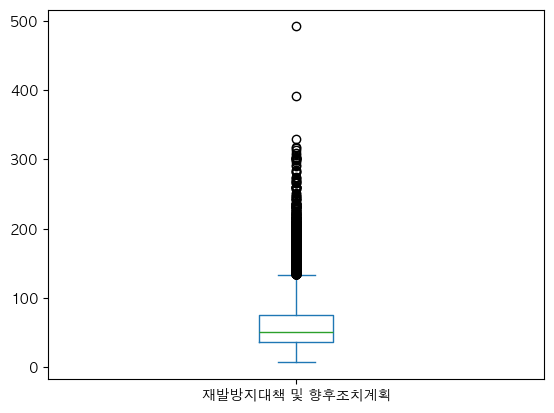

In [38]:
len_y =  y.map(lambda x : len(x))
len_y.plot(kind='box')

In [39]:
len_y.describe()

count    23422.000000
mean        60.187687
std         35.060058
min          7.000000
25%         36.000000
50%         51.000000
75%         75.000000
max        492.000000
Name: 재발방지대책 및 향후조치계획, dtype: float64

In [40]:
train_data.columns

Index(['ID', '발생일시', '사고인지 시간', '날씨', '기온', '습도', '공사종류', '연면적', '층 정보',
       '인적사고', '물적사고', '공종', '사고객체', '작업프로세스', '장소', '부위', '사고원인',
       '재발방지대책 및 향후조치계획'],
      dtype='object')

In [41]:
train_data[len_y <25].iloc[:,[-2, -1]]

,사고원인,재발방지대책 및 향후조치계획
1,부주의,재발 방지 대책 마련과 안전교육 실시.
21,공사현장 내부 바닥자재에 걸려 넘어짐,자재 정리에 대한 강조와 재발 방지 대책.
50,시스템 동바리 해체 작업 중 재해자가 멍에를 받아서 안고 미끄러지면서 시스템 횡대에...,작업방법 및 순서에 관한 교육 실시.
118,근로자간의 소통 부재,근로자 안전교육 실시와 안전작업 시행 계획.
121,작업자 부주의,재발방지 근로자 교육 실시.
...,...,...
23379,지하 1층에서 가시설 용접을 마치고 말비계를 내려오던 중 발을 헛디뎌 넘어지면서 왼...,작업자 교육을 통한 재발 방지 대책 마련.
23390,철근가공하는 숙련된 작업자임이었음. 단순 우연의 사고발생,사고 발생 방지를 위한 감리자의 조치.
23401,우측 무릎의 타박상,상부 작업 시 하부 통제구역 설정.
23413,작업구간 내 가설계단 이동 중 다리를 헛디뎌 넘어짐. 우측발목 및 허벅지에 타박상 입음.,근로자 안전교육 실시와 재발방지대책 수립.
